# Predicting Happiness Score using LinearRegression

# importing libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# load data

In [2]:
data=pd.read_csv("C:/Users/ankus/Downloads/2015.csv")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
data.shape

(158, 12)

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
#checking null values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
#dropping unwanted column
data=data.drop(columns=['Country','Region','Happiness Rank'])
data


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# checking data distribution

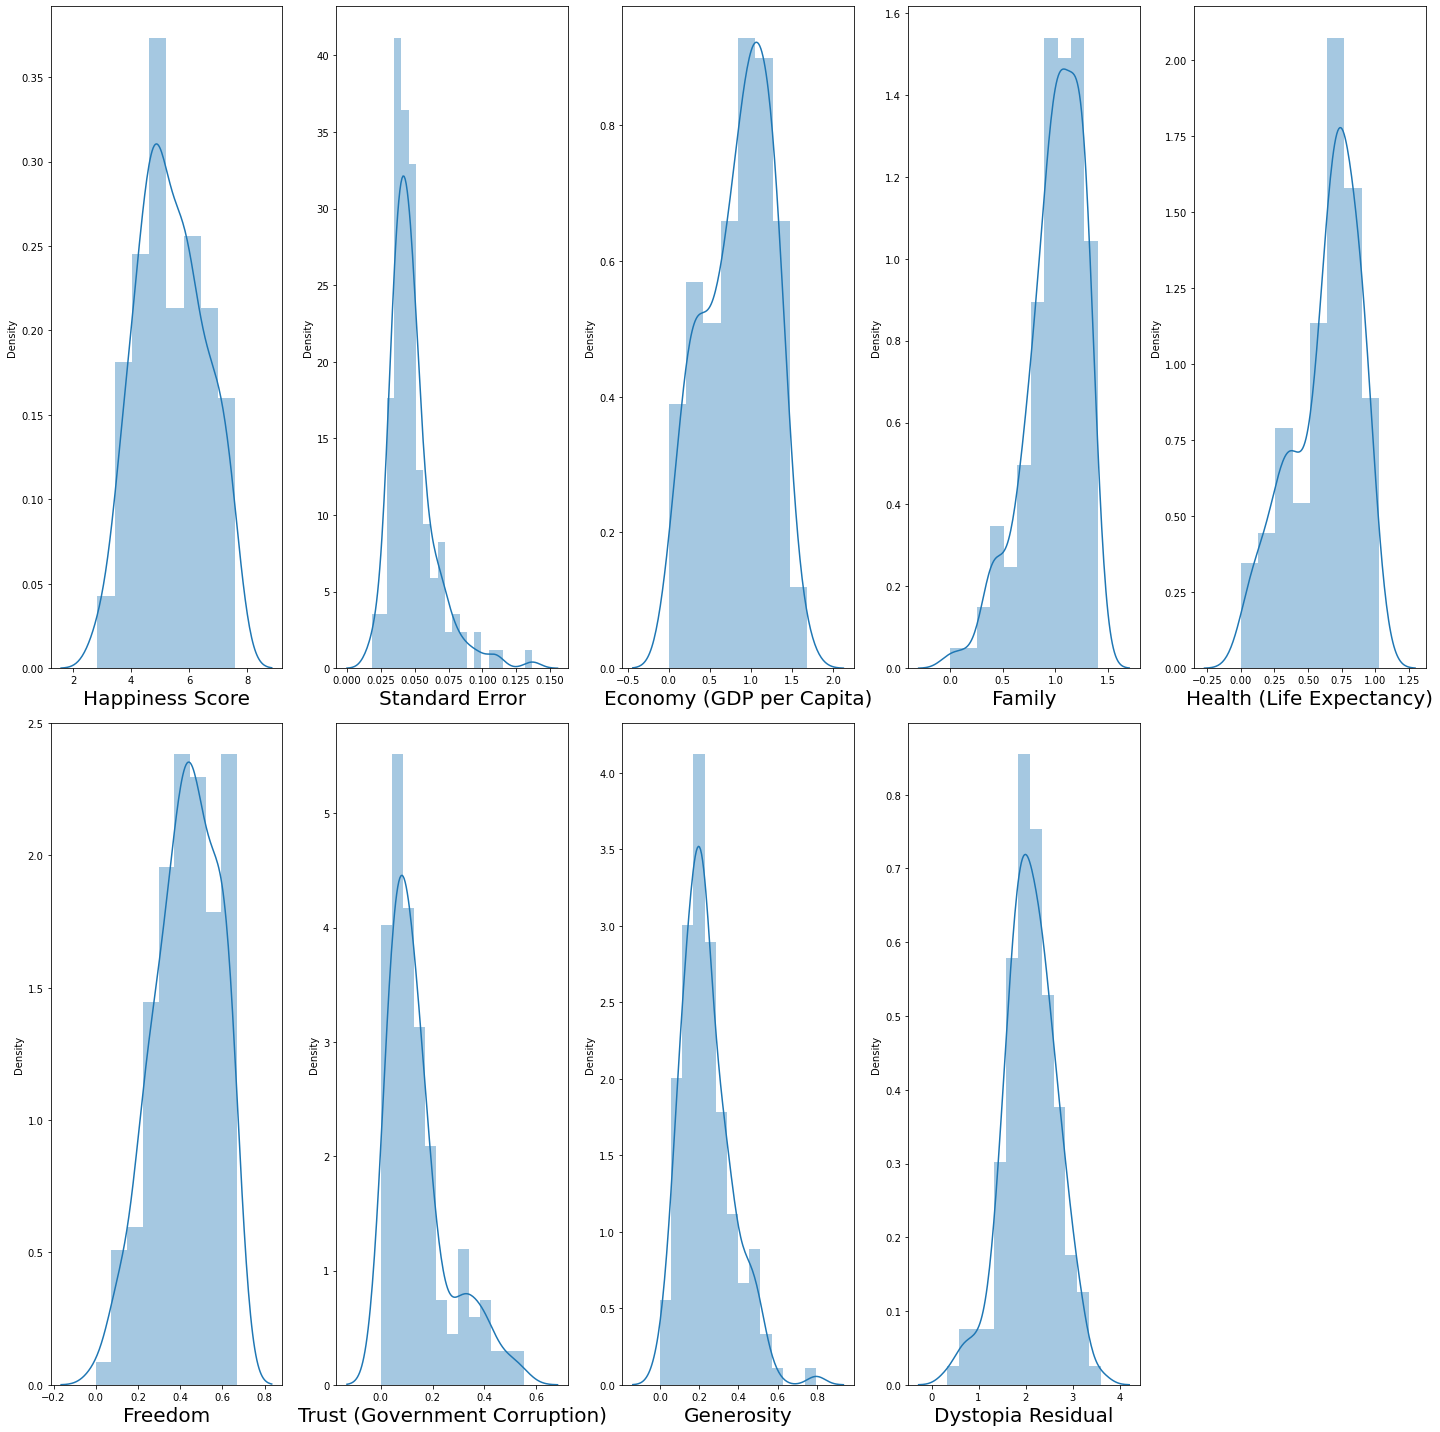

In [7]:

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [8]:
#divide the dataset into features and labels
x=data.drop(columns=['Happiness Score'])
y=data['Happiness Score']

In [9]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

# checking correlation between features and laels

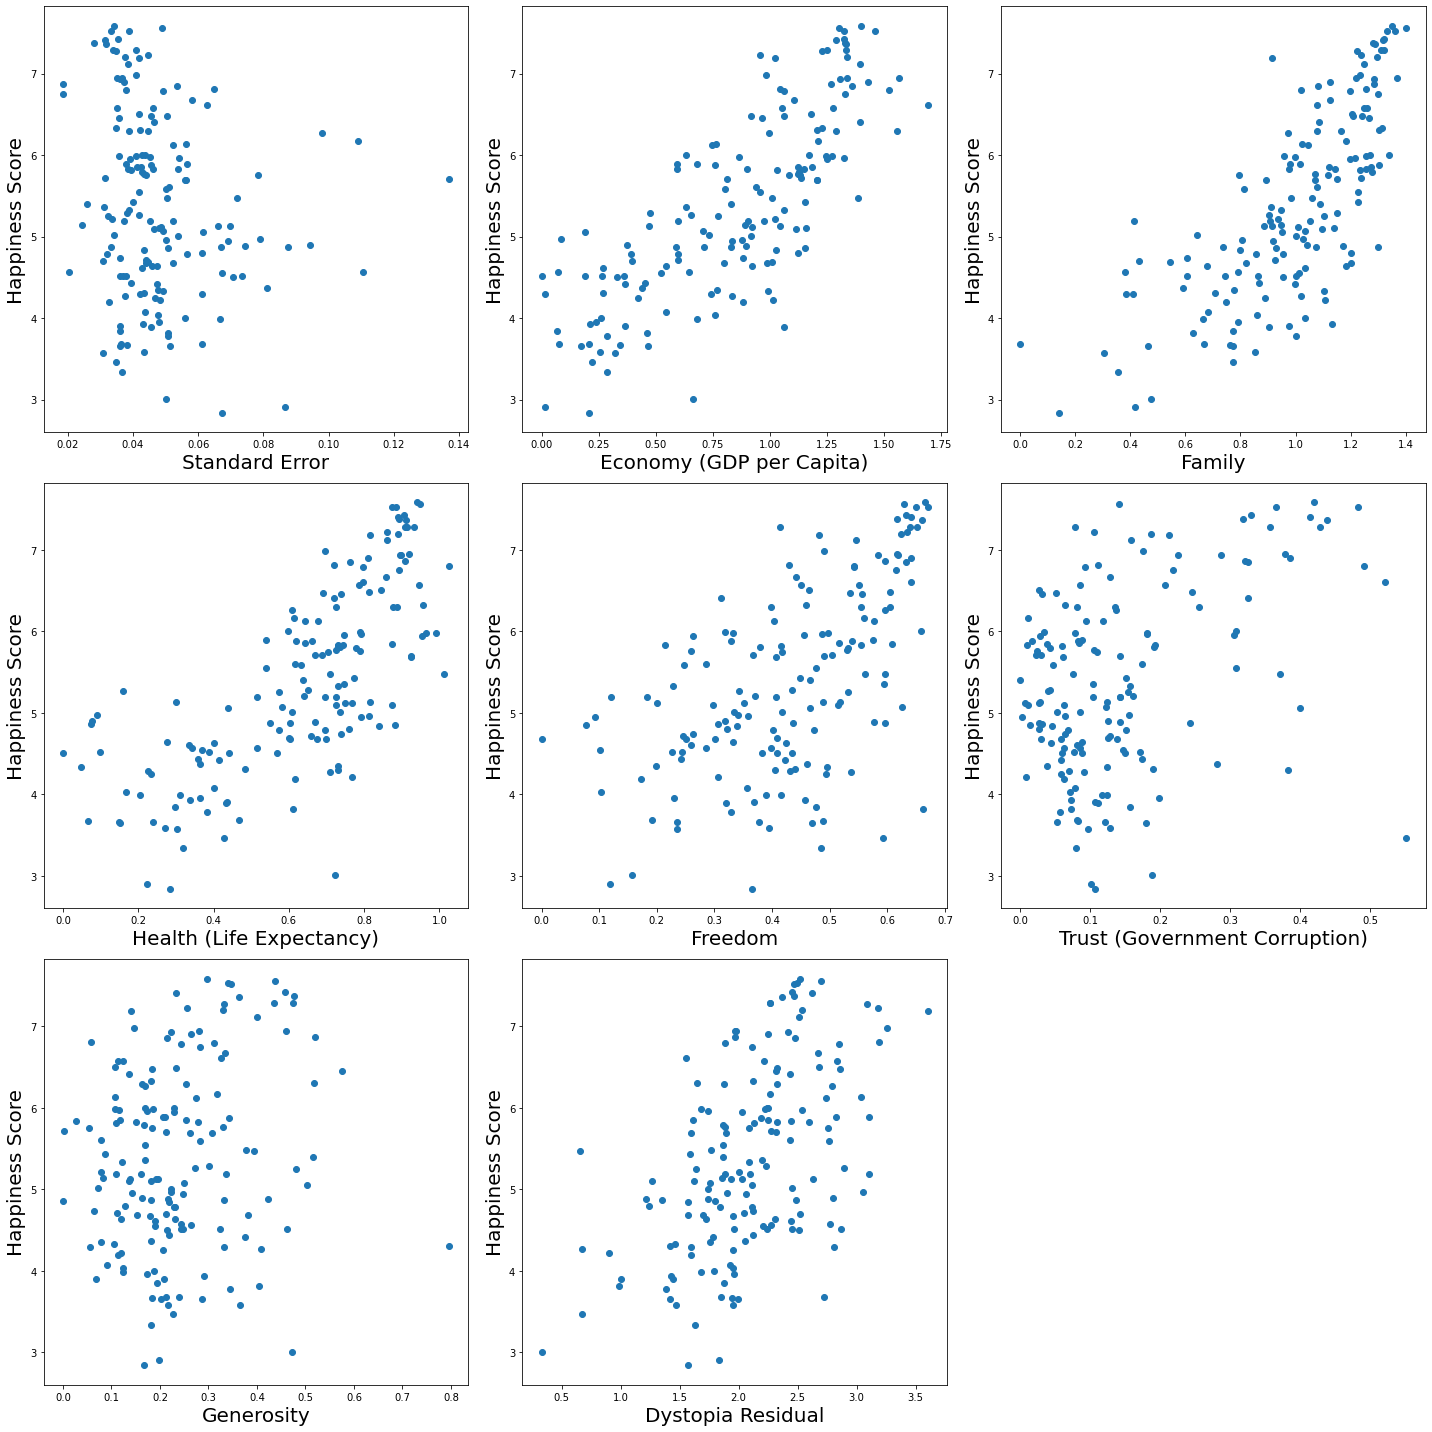

In [11]:
#visualizing relationship between features and labels
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

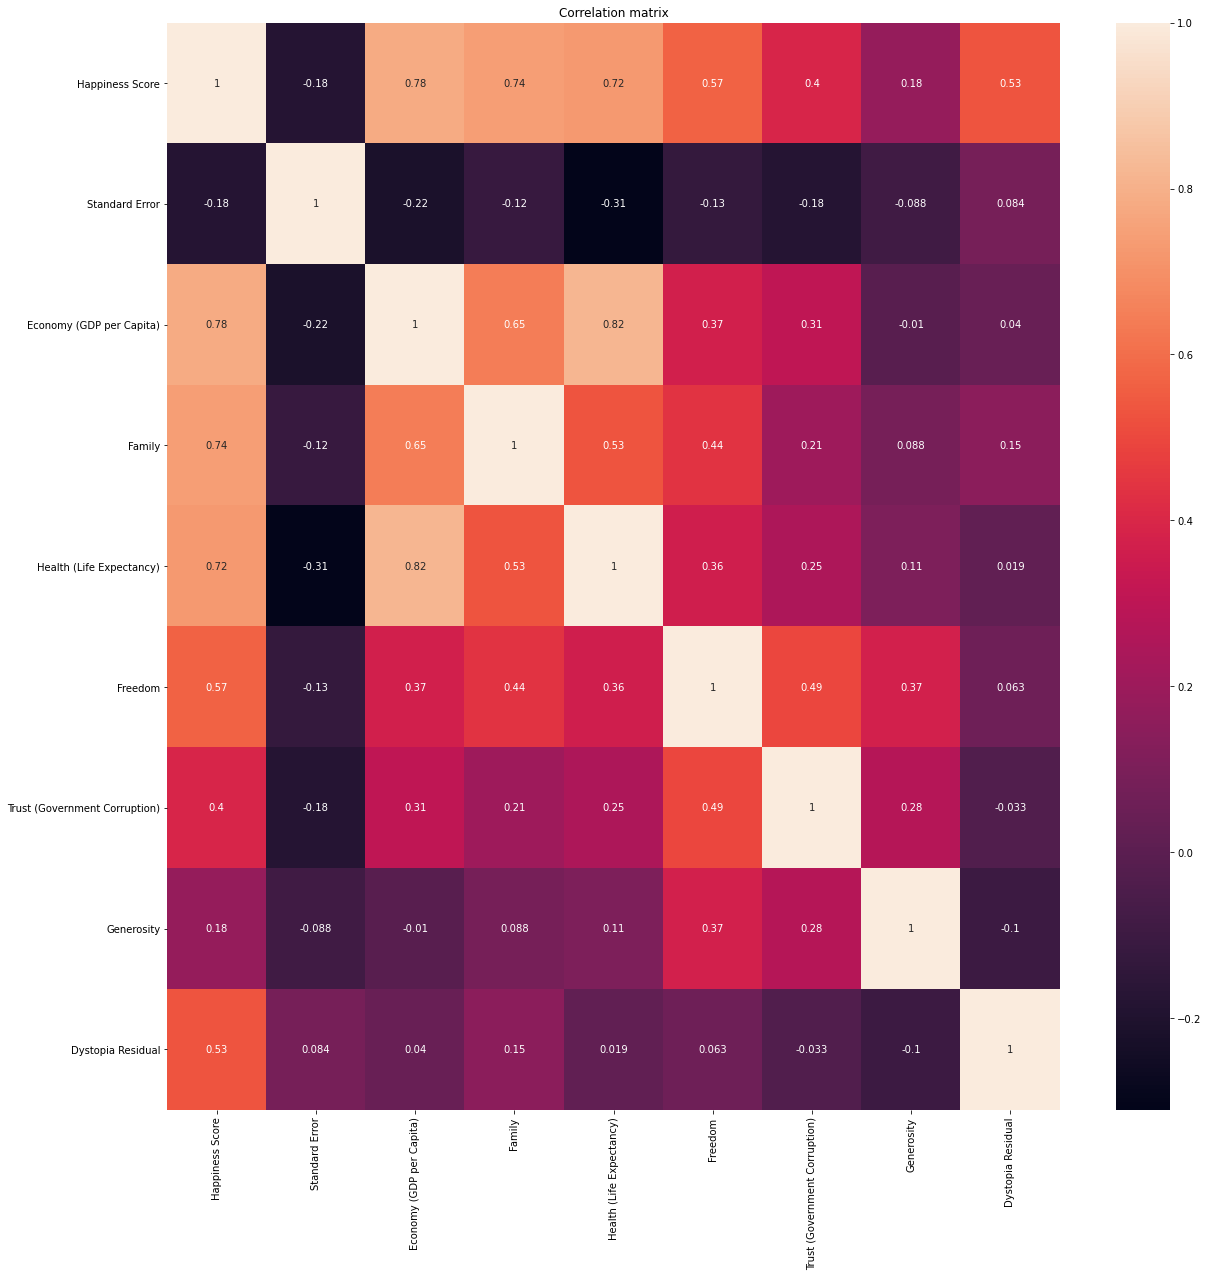

In [12]:
#check correlation among all the columns using heatmap
#plotting graph for correlation
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

In [15]:
#columns which are having high correlation with other column ,drop those columns 
data=data.drop(['Economy (GDP per Capita)'],axis=1)
data

,Happiness Score,Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# check for skewness

In [16]:
#checking skewness
x.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Dystopia Residual               -0.238911
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

data looks skewed

In [17]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [18]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [19]:
x.columns

Index(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [20]:
#validating that skewness is removed or not
x.skew().sort_values()

Health (Life Expectancy)        -0.183181
Family                          -0.169651
Economy (GDP per Capita)        -0.127233
Freedom                         -0.080728
Standard Error                  -0.020092
Generosity                       0.013320
Dystopia Residual                0.022925
Trust (Government Corruption)    0.185965
dtype: float64

now skewness has been removed

# check outliers

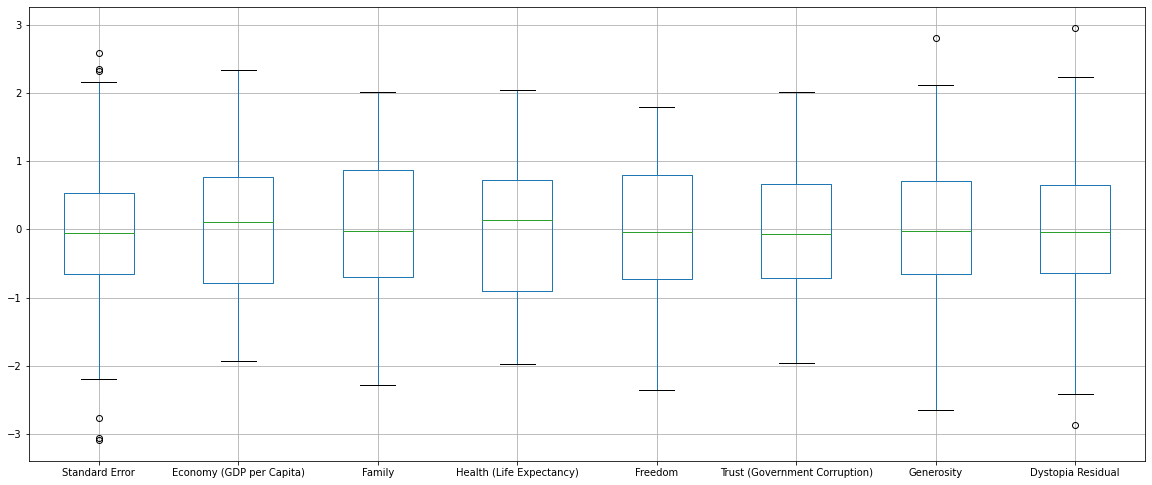

In [24]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

there are very few outliers so we can proceed further

# Data Scaling

In [21]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [22]:
x_scaled

array([[-0.9722262 ,  1.44606101,  1.66920633, ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 0.30934969,  1.17332111,  2.01213244, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-1.06201662,  1.23983557,  1.73958573, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 0.39913742, -0.5134688 , -1.69066357, ...,  0.73891461,
         1.65933595, -2.86621557],
       [ 1.92690194, -1.89495386, -1.79680304, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.31032295, -1.52122584, -2.16039658, ..., -0.06732623,
        -0.49041465, -0.97664547]])

now check vif score for scaled data

# vif score

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.143906,Standard Error
1,4.493828,Economy (GDP per Capita)
2,2.186437,Family
3,3.774367,Health (Life Expectancy)
4,2.005966,Freedom
5,1.389707,Trust (Government Corruption)
6,1.340102,Generosity
7,1.057327,Dystopia Residual


all the vif values are less than 5 that means there is no multicolinearity so we are good to go

Let's go ahead n and use linear regression and see how good it fit our data but first let's split our data in train and test

# Training Process

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [35]:
#finding  best random state
maxAccu=0     #maximum accuracy
maxRS=0       #best random state value for which max accuracy is achieved

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is :",maxAccu,"on Random_state",maxRS)

Best Accuracy is : 0.9954846871242079 on Random_state 6


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=6)
y_train.head()

141    3.904
98     4.876
91     5.013
51     5.889
100    4.867
Name: Happiness Score, dtype: float64

In [37]:
x_train

array([[-7.67589897e-01, -1.19431523e+00, -2.44730497e-01,
        -9.16801719e-01, -4.88093083e-01, -6.95589863e-02,
        -9.24067938e-02, -1.18484121e+00],
       [ 1.29828284e+00, -6.85702259e-01, -1.06598954e+00,
        -5.01450662e-01,  1.16702557e+00,  1.09771818e+00,
         1.40467218e+00, -6.81961555e-01],
       [-9.62619593e-01, -3.39464266e-01, -1.32749239e+00,
        -2.53076045e-01, -1.65782774e-01, -3.56785049e-01,
        -1.59186459e+00,  6.28883582e-01],
       [-5.80056827e-01, -6.76736131e-01, -8.27822250e-02,
        -2.15602514e-01, -7.33957905e-01, -1.58227313e+00,
        -8.26539363e-02,  1.92199469e+00],
       [ 1.94691826e+00, -3.95139736e-01,  1.70932346e-01,
        -1.84115865e+00, -8.63377626e-01, -1.28064478e+00,
        -3.34265681e-01,  6.92141595e-01],
       [-1.65446802e-01,  6.77644939e-01,  1.24347768e+00,
         5.53483510e-01,  6.55735170e-01, -1.05942444e+00,
        -4.82538354e-01, -4.56898451e-01],
       [-6.99629651e-01,  1.270051

In [38]:
y_train

141    3.904
98     4.876
91     5.013
51     5.889
100    4.867
       ...  
156    2.905
79     5.212
109    4.686
106    4.739
138    3.989
Name: Happiness Score, Length: 118, dtype: float64

In [39]:
x_test

array([[-1.68831652,  1.25124447,  1.24751108,  1.19308059,  1.33081553,
         1.45991648,  1.6800719 ,  0.65178123],
       [-1.06201662,  1.23983557,  1.73958573,  1.08522306,  1.6157332 ,
         1.90679207,  0.92797276,  0.70227525],
       [-1.34714663, -1.12357022, -1.77055161, -0.28666332, -0.22419775,
         0.14855892, -0.05830292,  0.75154986],
       [ 0.13284046,  0.64360058,  0.27651578,  0.2749482 , -0.9213773 ,
        -0.69210645, -0.33746353, -0.88270639],
       [ 0.07452003, -0.27762341,  1.39338598, -0.02587128,  0.71534623,
        -0.4001758 ,  0.9345204 ,  0.13036627],
       [-0.0581053 , -0.66688821, -0.44244074, -0.02965585, -1.21378542,
         0.18555793, -1.08268746, -0.13623074],
       [-0.82354794,  1.24216835,  1.50172605,  1.27017856,  1.47547945,
         1.50348412,  1.59222419,  0.62511807],
       [-0.9722262 ,  1.44606101,  1.66920633,  1.4917645 ,  1.75633466,
         1.77399061,  0.62239051,  0.75099154],
       [ 1.41436989, -0.96200462

In [40]:
y_test

6      7.378
2      7.527
108    4.694
88     5.098
52     5.878
107    4.715
4      7.427
0      7.587
84     5.129
39     6.269
83     5.140
54     5.848
113    4.633
30     6.505
126    4.350
143    3.845
71     5.474
101    4.857
122    4.507
140    3.931
74     5.360
19     6.901
137    3.995
53     5.855
105    4.786
111    4.677
145    3.781
134    4.194
45     5.987
61     5.759
38     6.295
72     5.429
23     6.798
37     6.298
32     6.477
18     6.937
92     5.007
139    3.956
16     6.946
13     7.187
Name: Happiness Score, dtype: float64

In [41]:
x_train.shape

(118, 8)

In [42]:
y_train.shape

(118,)

In [43]:
x_test.shape

(40, 8)

In [44]:
y_test.shape

(40,)

# MODEL INSTANTIATING AND TRAINING

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
#Adjusted r2 score
lr.score(x_train,y_train)*100

99.07160861218112

In [48]:
#let's check how well model fits the test data
lr.score(x_test,y_test)*100

99.54846871242079

# let's plot and visualize

In [49]:
y_pred=lr.predict(x_test)

In [50]:
y_pred

array([7.38124678, 7.51402601, 4.70906765, 5.09513256, 5.88820313,
       4.62811597, 7.4716999 , 7.6803683 , 5.06066711, 6.179648  ,
       5.03213299, 5.97448085, 4.53078513, 6.50550921, 4.26994824,
       3.85861938, 5.6660387 , 4.82435779, 4.590963  , 3.97771255,
       5.27338414, 6.83333975, 4.03062823, 5.78978233, 4.68551635,
       4.69293377, 3.76519374, 4.14776543, 6.17476755, 5.64700631,
       6.33413208, 5.48167528, 6.74920532, 6.31888311, 6.46482663,
       7.06220059, 4.94656831, 3.930563  , 7.01307388, 7.16858326])

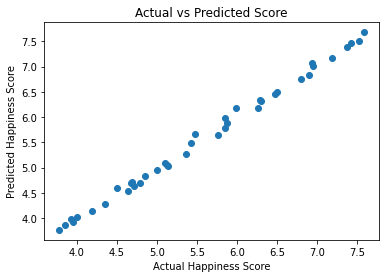

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Score')
plt.show()

# MODEL EVALUATION

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
y_pred=lr.predict(x_test)

In [54]:
mean_absolute_error(y_test,y_pred)

0.06041638987350147

In [55]:
mean_squared_error(y_test,y_pred)


0.005837769876800226

In [56]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.07640530005700014

Let's check if our model is overfitting our training data

# Cross Validation

In [64]:
train_accuracy=lr.score(x_train,y_train)
test_accuracy=lr.score(x_test,y_test)
from sklearn.model_selection import cross_val_score,GridSearchCV
cv_score=cross_val_score(lr,x_scaled,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7719326936341057

# Ensemble Technique

In [65]:
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [66]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2_score :',rfs*100)

rfscore=cross_val_score(rf,x_scaled,y,cv=5)
rfc=rfscore.mean()
print('Cross_val_score :',rfc*100)

R2_score : 92.80053274322798
Cross_val_score : -318.2603595548093


# conclusion

In [67]:
import pickle

In [68]:
#save file
filename='World Happiness Report.pkl'
pickle.dump(rf,open(filename,'wb'))

In [69]:
loaded_model=pickle.load(open('World Happiness Report.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

92.80053274322798


In [70]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Orignal","Predicted"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Orignal,7.14864,7.36825,4.93818,5.30785,5.78103,5.00324,7.27947,7.3568,4.7299,5.9207,...,6.19087,5.52801,6.24511,6.32282,6.26558,6.88824,5.02034,3.91975,6.68983,6.16046
Predicted,7.14864,7.36825,4.93818,5.30785,5.78103,5.00324,7.27947,7.3568,4.7299,5.9207,...,6.19087,5.52801,6.24511,6.32282,6.26558,6.88824,5.02034,3.91975,6.68983,6.16046


# Complete!